   Rank                  Video Game Platform  Year    Genre  \
0   222                     FIFA 17      PS4  2016   Sports   
1   272  Uncharted 4: A Thief's End      PS4  2016  Shooter   
2   352   Tom Clancy's The Division      PS4  2016  Shooter   
3   772             Far Cry: Primal      PS4  2016   Action   
4   847   Tom Clancy's The Division     XOne  2016  Shooter   

                     Publisher  North American Sales  EU Sales  Japan Sales  \
0              Electronic Arts                  0.28      3.75         0.06   
1  Sony Computer Entertainment                  1.30      2.07         0.18   
2                      Ubisoft                  1.28      1.61         0.15   
3                      Ubisoft                  0.59      1.16         0.06   
4                      Ubisoft                  1.20      0.62         0.00   

   Other Sales  World Sales  
0         0.69         4.77  
1         0.65         4.20  
2         0.57         3.61  
3         0.33         2.1

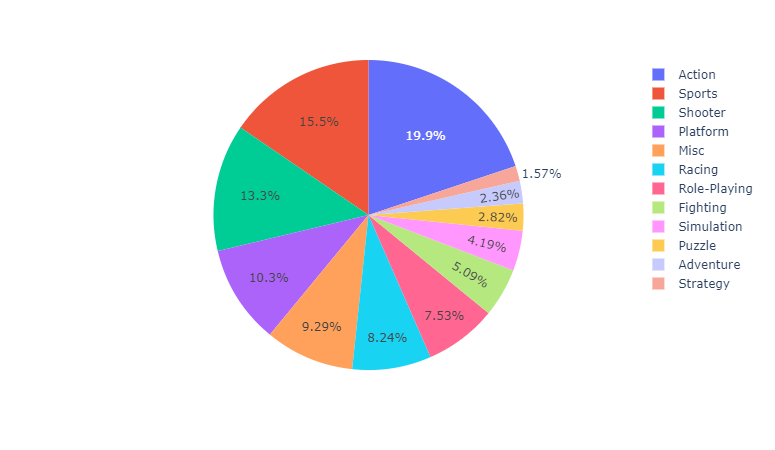

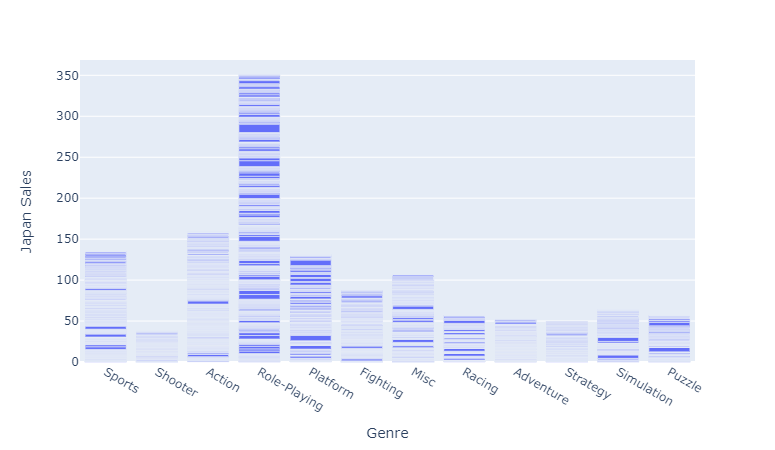

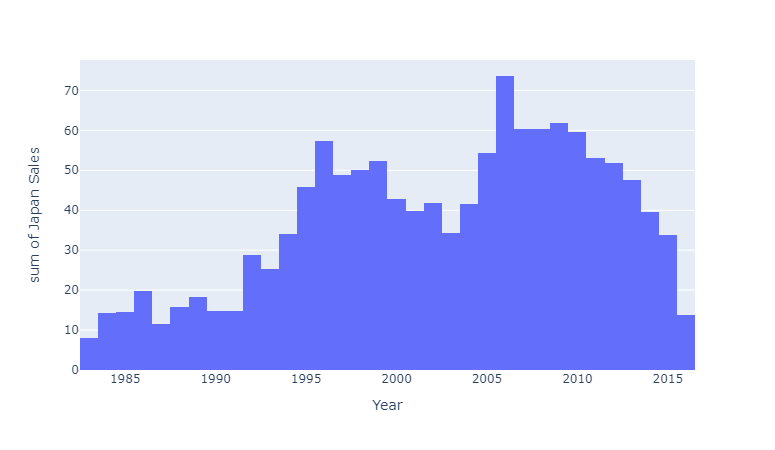

Dash app running on http://127.0.0.1:8053/


c:\users\cylaw\new project\env\lib\site-packages\jupyter_dash\jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Action
Fighting


In [11]:
#https://www.youtube.com/watch?v=acFOhdo_bxw
## notice I have changed the code below to add extra charts in Dash

import dash
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash

# Data Exploration with Pandas (python)
# -----------------------------------------------------------------

df = pd.read_csv("vgsales.csv") # data by GregorySmith from kaggle

print(df[:5])
print(df.iloc[:5, [2,3,5,10]])
print(df.Genre.nunique())
print(df.Genre.unique())
print(sorted(df.Year.unique()))

# Data Visualization with Plotly (Python)
# -----------------------------------------------------------------

fig_pie = px.pie(data_frame=df, names='Genre', values='Japan Sales')
fig_pie = px.pie(data_frame=df, names='Genre', values='North American Sales')
fig_pie.show()

fig_bar = px.bar(data_frame=df, x='Genre', y='Japan Sales')
fig_bar.show()

fig_hist = px.histogram(data_frame=df, x='Year', y='Japan Sales')
fig_hist.show()

# Interactive Graphs with Dash (Python, R, Julia)
# -----------------------------------------------------------------

import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input

app = JupyterDash(__name__)

app.layout=html.Div([
    html.H1("Graph Analysis with Charming Data"),
    dcc.Dropdown(id='genre-choice',
                 options=[{'label':x, 'value':x}
                          for x in sorted(df.Genre.unique())],
                 value='Action'
                 ),
    html.H2("Japan Data"),
    dcc.Graph(id='my-graph',
              figure={}),
    html.H2("North American Data"),
    dcc.Graph(id='my-graph2',
             figure={})
])
@app.callback(
    [Output(component_id='my-graph', component_property='figure')],
    [Output(component_id='my-graph2', component_property='figure')],
    Input(component_id='genre-choice', component_property='value')
)
def interactive_graphs(value_genre):
    print(value_genre)
    dff = df[df.Genre==value_genre]  #<-filter the df in accordance with the genre user picked
    fig = px.bar(data_frame=dff, x='Year', y='Japan Sales')
    
    fig2 = px.bar(data_frame=dff, x='Year', y='North American Sales')
    
    
    return fig,fig2

app.run_server(mode='external',port=8053)

# if __name__=='__main__':
#     app.run_server()

In [7]:
df = pd.read_csv("vgsales.csv")
df

,Rank,Video Game,Platform,Year,Genre,Publisher,North American Sales,EU Sales,Japan Sales,Other Sales,World Sales
0,222,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
1,272,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
2,352,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
3,772,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
4,847,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
...,...,...,...,...,...,...,...,...,...,...,...
16318,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
16319,4027,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,0.49
16320,5368,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
16321,6319,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
